In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### Análise Exploratória

In [3]:
df.shape

(156, 6)

Não temos dados ausentes.

Temos um campo categórico (Crop)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [5]:
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


array([[<Axes: title={'center': 'Precipitation (mm day-1)'}>,
        <Axes: title={'center': 'Specific Humidity at 2 Meters (g/kg)'}>],
       [<Axes: title={'center': 'Relative Humidity at 2 Meters (%)'}>,
        <Axes: title={'center': 'Temperature at 2 Meters (C)'}>],
       [<Axes: title={'center': 'Yield'}>, <Axes: >]], dtype=object)

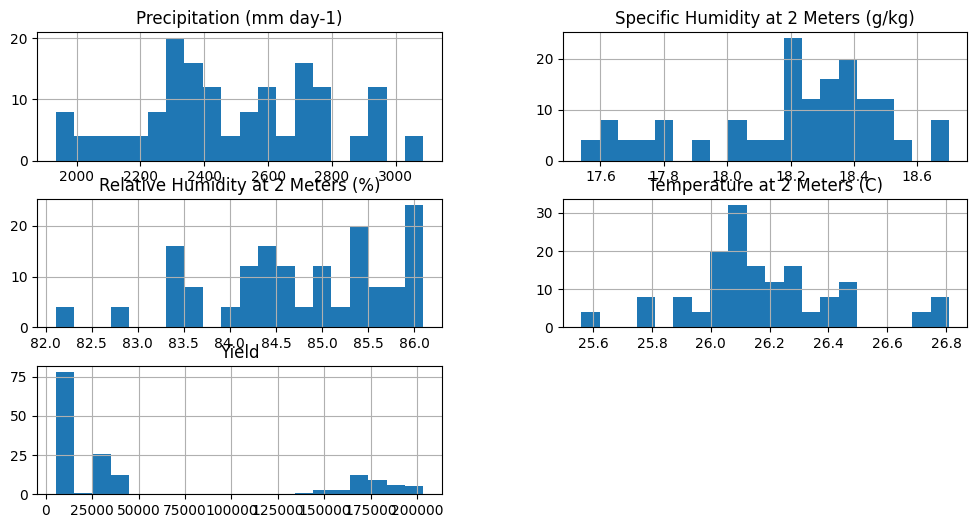

In [6]:
df.hist(bins=20, figsize=(12,6))

Correlação das variáveis

Aparentemente, nenhuma das variáveis tem uma correlação forte (negativamente ou positivamente) com a variável alvo (Yield).

<Axes: >

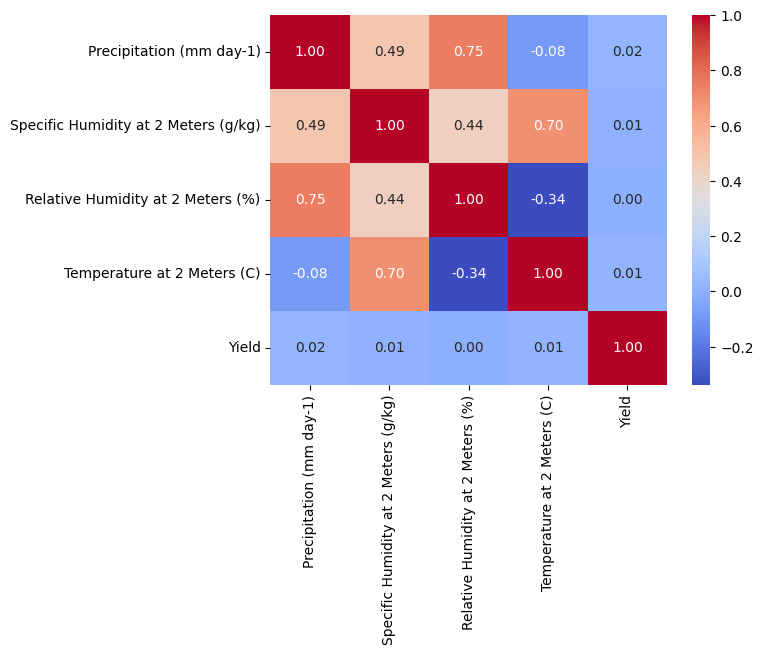

In [7]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

Boxplots para visualizar a distribuição dos valores das variáveis e verificar a presença de outliers.

É possível visualizar outliers em temperatura e rendimento, porém, por enquanto iremos manter esses dados.

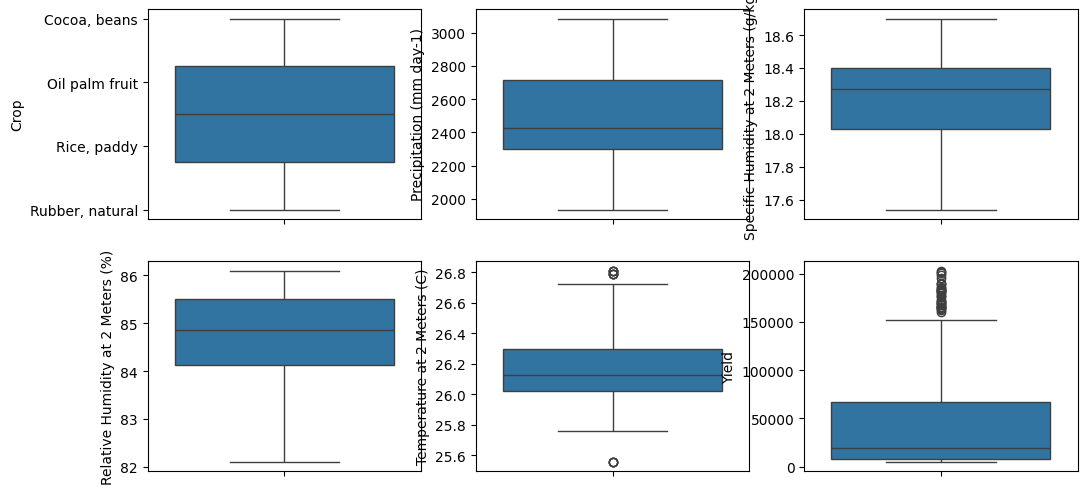

In [8]:
plt.figure(figsize=(12,6))
for i in range(0, len(df.columns)):
    plt.subplot(2,3, i+1)
    sns.boxplot(df[df.columns[i]])

Exibindo gráficos de dispersão para observar a correlação das variáveis independentes com a variável alvo (Yield).

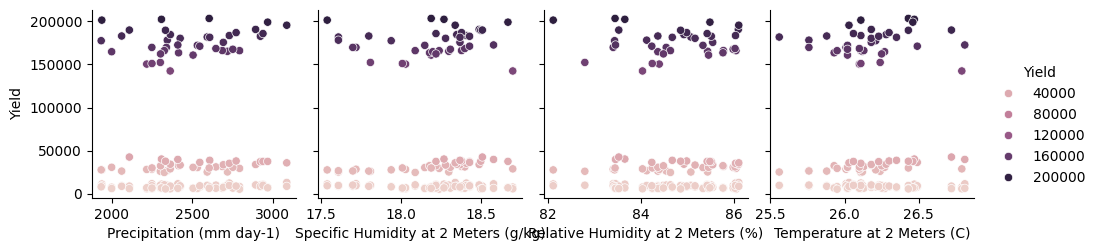

In [9]:
sns.pairplot(df, y_vars='Yield', hue='Yield')

Através da observação do padrão existente das variáveis dependentes com a coluna Yield, é possível observar que os dados podem estar agrupados em diferentes *faixas de rendimento*, ao invés de seguir uma relação linear direta com as variáveis climáticas.

Uma das possibilidades interessantes é que o rendimento pode estar sendo segmentado por categorias ocultas (clusters). Talvez possamos observar estes agrupamentos através da variável categórica "Crop".

Fazendo o tratamento da coluna categórica "Crop" para dados numéricos:

In [10]:
le = LabelEncoder()

df['Crop'] = le.fit_transform(df['Crop'])
df['Crop'].value_counts()

Crop
0    39
1    39
2    39
3    39
Name: count, dtype: int64

Assim como o gráfico de dispersão anterior, utilizando a variável Yield ou Crop para colorir cada ponto no gráfico, ambos representam o mesmo padrão de agrupamento, algo que pode comprovar a presença agrupamentos de faixas de rendimentos distintas para cada tipo de cultura.

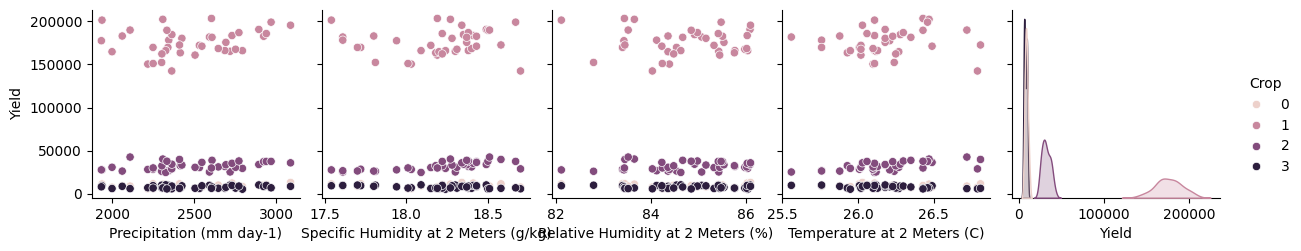

In [11]:
sns.pairplot(df, y_vars='Yield', hue='Crop')

Utilizaremos um algoritmo de clusterização (DBSCAN) para visualizar se é retornado os mesmos agrupamentos, porém antes, será necessário realizar uma normalização dos valores numéricos.

In [12]:
normalization = MinMaxScaler()
X_normalized = normalization.fit_transform(df.drop(['Crop'], axis=1))

In [13]:
dbscan = DBSCAN(eps=0.4, min_samples=3)

dbscan_result = dbscan.fit_predict(X_normalized)
dbscan_result

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [14]:
df_tests = df.copy()
df_tests['cluster_predicted'] = dbscan_result

Não foi possível ter o retorno com os agrupamentos identicos, porém não há como negar que este agrupamento existe e está presente na coluna "Crop".

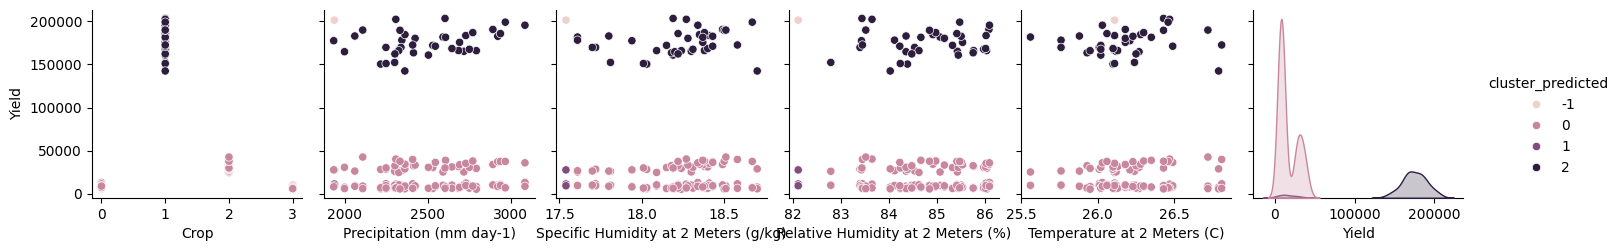

In [15]:
sns.pairplot(df_tests, y_vars='Yield', hue='cluster_predicted')

Por mais que não exista uma correlação linear entre as variáveis, ainda é possível que exista uma relação não linear (exemplo, exponencial, quadrática, logarítmica). Iremos testar algumas transformações de log e raiz quadrada para averiguar novamente as correlações.

In [16]:
df_tests['log_precipitation'] = np.log(df['Precipitation (mm day-1)'] + 1)
df_tests['sqrt_humidity'] = np.sqrt(df['Relative Humidity at 2 Meters (%)'])

<Axes: >

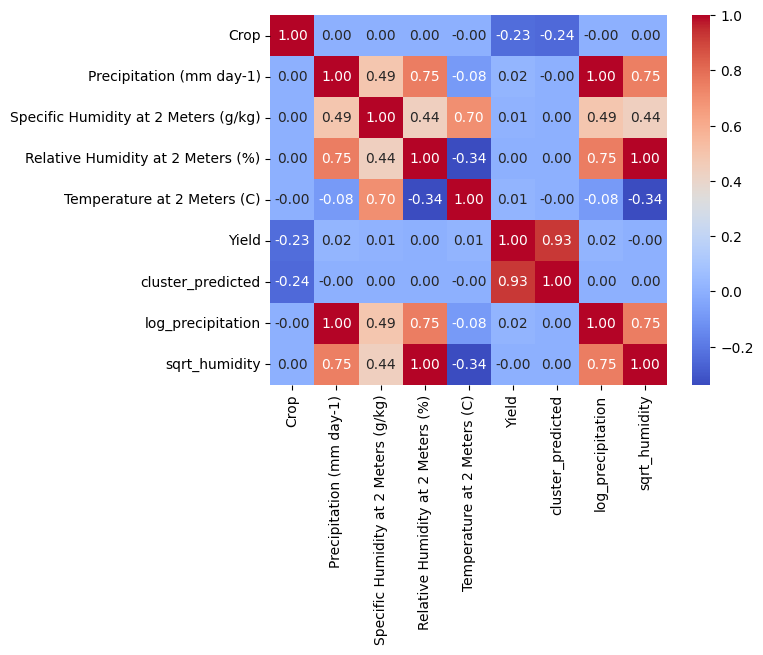

In [17]:
corr = df_tests.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

### Pré-processamento

In [18]:
# TODO